# T-Tests

Week 3 Task



Notes:

### Video 1

> T-Test Distribution
This is a continous Probability Distribution - in which the random variable X can take on any value (is continuous). Because there are infinite values that X could assume, the probability of X taking on any one specific value is zero. [1]

> The T-test distribution is a value of X that lives on the real number line therefore you cannot assign it to a discrete probability distribution ( probability of the number of Queens in a deck of card for example - 4 in 52). The way to discribe this is instead to have a curve, where the area nuder the curve is 1, and it represents, the curve represents, the probability of seeing a given vale of X in a given interval.

> Similar to a Normal Distribution

Notes:

### Video 2

T-Tests and Normal Distrbutions

> https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php

> The independent-samples t-test (or independent t-test, for short) compares the means between two unrelated groups on the same continuous, dependent variable. For example, you could use an independent t-test to understand whether first year graduate salaries differed based on gender (i.e., your dependent variable would be "first year graduate salaries" and your independent variable would be "gender", which has two groups: "male" and "female"). 

> T-Test - 2 sets of numbers, normally distributed. What does this mean? 


In [87]:
# plotting
import matplotlib.pyplot as plt

# numerical arrays
import numpy as np

# dataframes
import pandas as pd

# cycle through plotting styles
from cycler import cycler

# "Returns the error function of complex argument"
from scipy.special import erf

# additional plotting
import seaborn as sns

# statistics
import scipy.stats as ss


from matplotlib.patches import Ellipse

from matplotlib.text import OffsetFrom

from scipy.stats import lognorm




<div style='text-align: center;'>
Probability Density Function
</div>

</br>

$$

f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{1}{2} \big(\frac{x- \mu}{\sigma} \big)^2 }

$$

</br>

$ \mu $  mu is the mean or expectation of the distribution

$ \sigma ^2 $ sigma squared is the variance

$ \sigma $ sigma is the standard diviation

</br>

[2][3][4]



This plot shows us the following:

The green has shifted to the left - not centred

Sigma Sq - the higher the value the wider and shorter the curve



![alternative text](images/Normal_Distribution.png)

[2][3][4]

In [28]:
# Python function for Normal Probability Function
# here we have set a default value for sigma - if no sigma value is passed in this will be used by the function
# pi in included in the numpy package
# exp is also included in the numpy package

def normal_pdf(x, mu=0.0, sigma=1.0):
    # Answer: A*B
    A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    B = np.exp(- 0.5 * ((x - mu) / sigma) **2)

    return A*B


# this is the standard normal distribution when the values as set as follows
# mu = 0
# sigma = 1

In [29]:
normal_pdf(0.0)

# this will be standard normal distribution
# answer here will be approx 0.4 which corresponds to the Y axis
# this is the red line in the above graph

#[2]

0.3989422804014327

In [30]:
normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.2))

# answer here will be approx 0.9 which corresponds to the Y axis
# this is the blue line in the above graph

#[2]

0.8920620580763857

In [31]:
normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.5))

# answer here will be approx 0.9 which corresponds to the Y axis
# this is the yellow line in the above graph

#[2]

0.5641895835477563

In [32]:
normal_pdf(0.0, mu=-2.0, sigma=np.sqrt(0.5))

# answer here will be approx 0.01 which corresponds to the X axis - almost 0 on both axis
# mu here pulls the curve to the left into the negative unlike the other examples
# this is the green line in the above graph

#[2]

0.010333492677046035

## Recreating above Graph



https://commons.wikimedia.org/wiki/File:Normal_Distribution_PDF.svg

Wiki gives different sizes - save this way as an alternative and just use a link

![Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)


[2]

Here we will create a plot

The following code blocks show a progression in the plotting, with code becoming more efficient and also more detail being added.

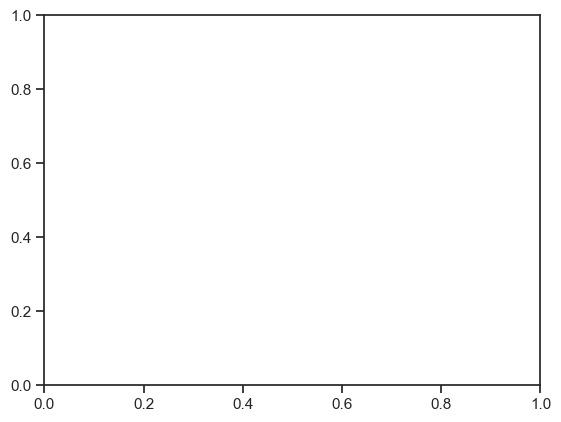

In [33]:
# create a plot

fig, ax = plt.subplots()


# range of x values

x = np.linspace(-5.0, 5.0, 1001)

# fence post problem - go to 1001 as opposed to 1000

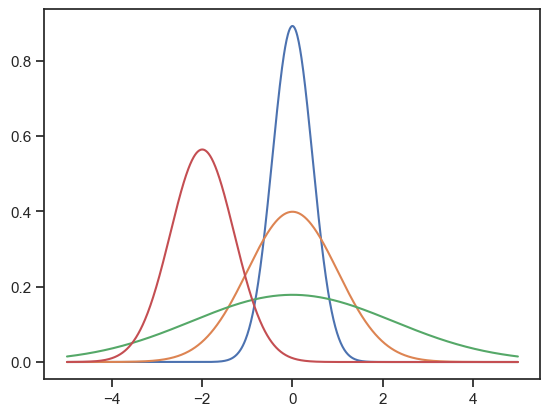

In [34]:
# plot values

fig, ax = plt.subplots()

x = np.linspace(-5.0, 5.0, 1001)

# using np in the above formula will allow us to plot 

ax.plot(x, normal_pdf(x, mu=0.0, sigma=np.sqrt(0.2)))
ax.plot(x, normal_pdf(x, mu=0.0, sigma=np.sqrt(1.0)))
ax.plot(x, normal_pdf(x, mu=0.0, sigma=np.sqrt(5.0)))
ax.plot(x, normal_pdf(x, mu=-2.0, sigma=np.sqrt(0.5)))

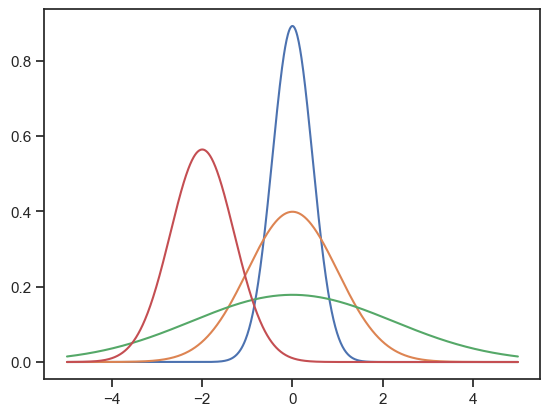

In [35]:
# plot values with a for loop - more efficent than above
# create a list of lists to be plotted

fig, ax = plt.subplots()

x = np.linspace(-5.0, 5.0, 1001)

# using np in the above formula will allow us to plot 
# note here we have sigma2 as a variable to allow us to pass in the values
for mu, sigma2 in [ [0.0 , 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5] ]:
    ax.plot(x, normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2)))


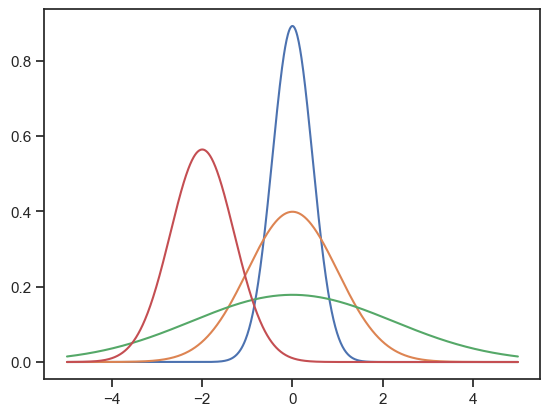

In [36]:
# plot values with a for loop - more efficent than above
# create a list of lists to be plotted

fig, ax = plt.subplots()

x = np.linspace(-5.0, 5.0, 1001)

# making it clearer what we are plotting on each axis
for mu, sigma2 in [ [0.0 , 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5] ]:
    y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
    ax.plot(x, y)


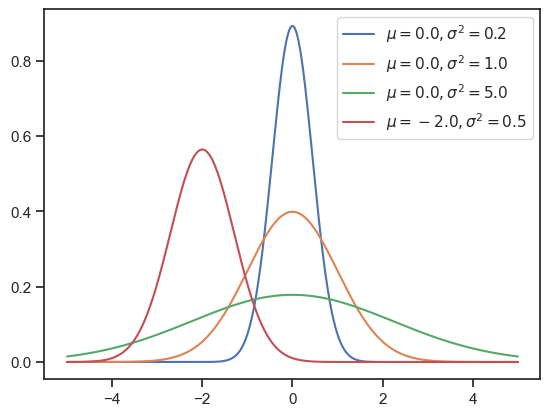

In [37]:
# plot values and add label

fig, ax = plt.subplots()

x = np.linspace(-5.0, 5.0, 1001)

# making it clearer what we are plotting on each axis
for mu, sigma2 in [ [0.0 , 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5] ]:
    y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
    ax.plot(x, y, label=f'$ \mu={mu}, \sigma^2 = {sigma2}$')

# once you add this label= you can add a legend
# we are adding label into this


# add a legend

ax.legend()

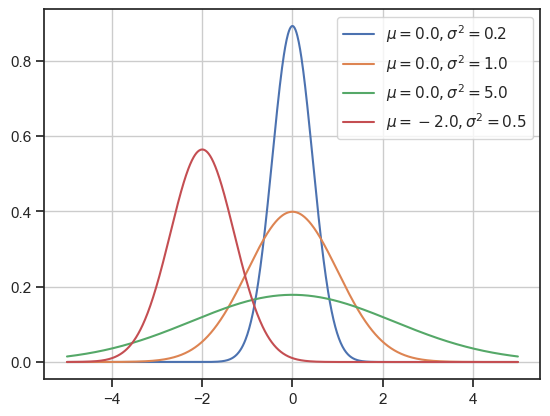

In [38]:
# Add grid

fig, ax = plt.subplots()

x = np.linspace(-5.0, 5.0, 1001)

# making it clearer what we are plotting on each axis
for mu, sigma2 in [ [0.0 , 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5] ]:
    y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
    ax.plot(x, y, label=f'$ \mu={mu}, \sigma^2 = {sigma2}$')

# once you add this label= you can add a legend
# we are adding label into this


# add a legend

ax.legend()

# add a grid to the plot

ax.grid()


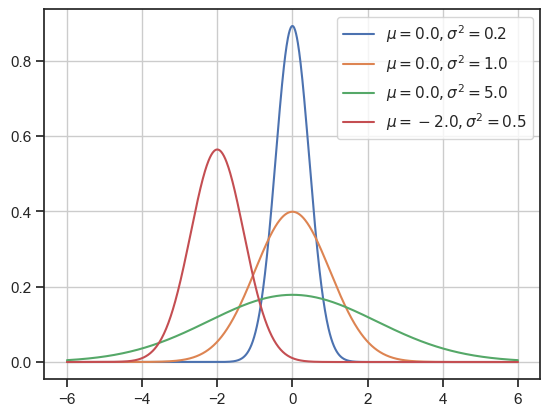

In [39]:
# expand grid

fig, ax = plt.subplots()

x = np.linspace(-6.0, 6.0, 1001)

# making it clearer what we are plotting on each axis
for mu, sigma2 in [ [0.0 , 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5] ]:
    y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
    ax.plot(x, y, label=f'$ \mu={mu}, \sigma^2 = {sigma2}$')

# once you add this label= you can add a legend
# we are adding label into this


# add a legend

ax.legend()

# add a grid to the plot

ax.grid()

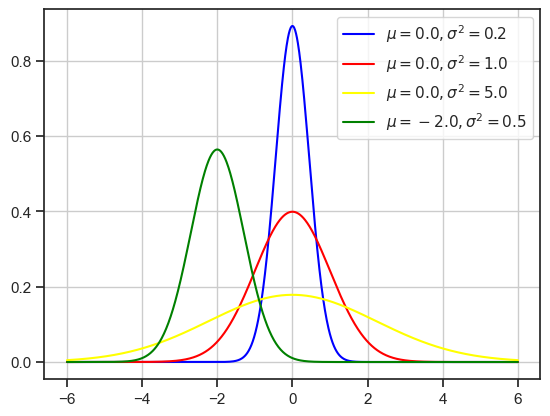

In [40]:
# set colurs as per the original graph



fig, ax = plt.subplots()

x = np.linspace(-6.0, 6.0, 1001)

# Colours
custom_cycler = cycler(color=['blue', 'red', 'yellow', 'green'])
ax.set_prop_cycle(custom_cycler)

# making it clearer what we are plotting on each axis
for mu, sigma2 in [ [0.0 , 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5] ]:
    y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
    ax.plot(x, y, label=f'$ \mu={mu}, \sigma^2 = {sigma2}$')

# once you add this label= you can add a legend
# we are adding label into this


# add a legend

ax.legend()

# add a grid to the plot

ax.grid()



# [5][6][7][8]

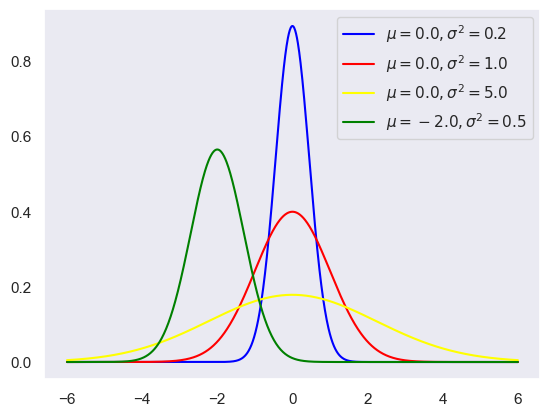

In [41]:

#fig, ax = plt.subplots()

sns.set()
fig, ax = plt.subplots()
x = np.linspace(-6.0, 6.0, 1001)

# Colours
custom_cycler = cycler(color=['blue', 'red', 'yellow', 'green'])
ax.set_prop_cycle(custom_cycler)

# making it clearer what we are plotting on each axis
for mu, sigma2 in [ [0.0 , 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5] ]:
    y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
    ax.plot(x, y, label=f'$ \mu={mu}, \sigma^2 = {sigma2}$')

# once you add this label= you can add a legend
# we are adding label into this


# add a legend

ax.legend()

# add a grid to the plot

ax.grid()



# [5][6][7][8]

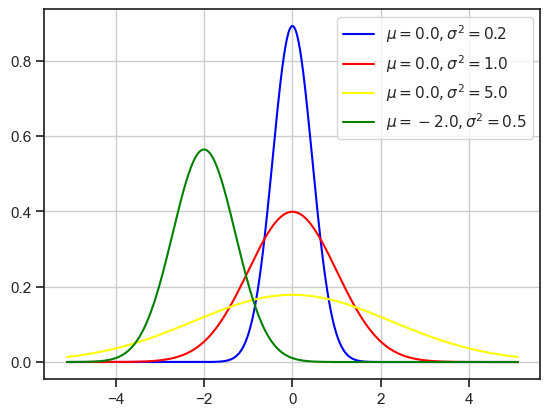

In [75]:
#fig, ax = plt.subplots()

sns.set_style("ticks")
fig, ax = plt.subplots()
x = np.linspace(-5.1, 5.1, 1001)

# Colours
custom_cycler = cycler(color=['blue', 'red', 'yellow', 'green'])
ax.set_prop_cycle(custom_cycler)

# making it clearer what we are plotting on each axis
for mu, sigma2 in [ [0.0 , 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5] ]:
    y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
    ax.plot(x, y, label=f'$ \mu={mu}, \sigma^2 = {sigma2}$')

# once you add this label= you can add a legend
# we are adding label into this


# add a legend

ax.legend()

# add a grid to the plot

ax.grid()


Probability Density Function

The below shows the probability percentages of values for the normal distribution


> https://en.wikipedia.org/wiki/Probability_theory



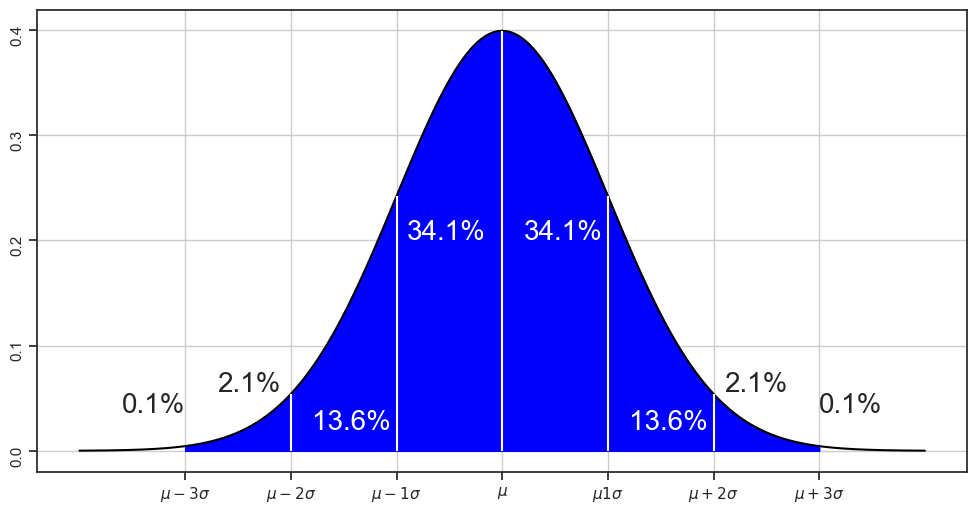

In [43]:


fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(-4.0, 4.0, 1001)


mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))

ax.plot(x, y, label=f'$ \mu={mu}, \sigma^2 = {sigma2}$', color='black')


ax.vlines(0.0, 0.0, normal_pdf(0.0), color="white")
ax.vlines([-1.0, 1.0,], 0.0, normal_pdf(-1.0), color="white")
ax.vlines([-2.0, 2.0,], 0.0, normal_pdf(-2.0), color="white")

x_interval = np.linspace(-1.0, 1.0, 101)
ax.fill_between(x_interval, normal_pdf(x_interval), color='blue')

ax.fill_between(x, y, where=((x >= -3) & (x <= -2)), color='blue')
ax.fill_between(x, y, where=((x >= - 2) & (x <= -1)), color='blue')
ax.fill_between(x, y, where=((x >= 1) & (x <= 2)), color='blue')
ax.fill_between(x, y, where=((x >= 2) & (x <= 3)), color='blue')
#ax.fill_between(x, y, where=((x >= 2) & (x <= 3)), color='red')

ax.set_xticks([-3,-2,-1,0, 1, 2, 3])
ax.set_xticklabels(['$\mu-3\sigma $', '$\mu-2\sigma $', '$\mu-1\sigma $', '$\mu $','$\mu1\sigma $', '$\mu+2\sigma $', '$\mu+3\sigma $',])

ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4 ])
for tick in ax.get_yticklabels():
    tick.set_rotation(90)




ax.annotate('0.1%', xy=(-3.3,0.03), xycoords='data', fontsize=20,  arrowprops=dict(facecolor='black', arrowstyle="-"), horizontalalignment='center', verticalalignment='bottom')
ax.annotate('2.1%', xy=(-2.4,0.05), xycoords='data', fontsize=20, arrowprops=dict(facecolor='black', arrowstyle="-"), horizontalalignment='center', verticalalignment='bottom')
ax.annotate('13.6%', xy=(-1.8,0.02), xycoords='data', color='white', fontsize=20)
ax.annotate('34.1%', xy=(-0.9, 0.2), xycoords='data', color='white', fontsize=20)
ax.annotate('34.1%', xy=(0.2, 0.2), xycoords='data', color='white', fontsize=20)
ax.annotate('13.6%', xy=(1.2 , 0.02), xycoords='data', color='white', fontsize=20)
ax.annotate('2.1%', xy=(2.4 , 0.05), xycoords='data', fontsize=20, arrowprops=dict(facecolor='black', arrowstyle="-"), horizontalalignment='center', verticalalignment='bottom')
ax.annotate('0.1%', xy=(3.3, 0.03), xycoords='data', fontsize=20, arrowprops=dict(facecolor='black', arrowstyle="-"), horizontalalignment='center', verticalalignment='bottom')


ax.grid()

#print(f'(-1.0, {normal_pdf(-1.0)})')

#print(f'(1.0, {normal_pdf(1.0)})')

In [44]:
# https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm
# https://stackabuse.com/rotate-axis-labels-in-matplotlib/
# https://stackoverflow.com/questions/56976122/how-to-shade-a-region-under-a-curve
# https://stackoverflow.com/questions/49630427/how-to-plot-normal-distribution-with-percentage-of-data-as-label-in-each-band-bi
# https://stackoverflow.com/questions/43360414/annotate-the-quartiles-with-matplotlib-in-a-normal-distribution-plot
# https://matplotlib.org/stable/users/explain/text/annotations.html#annotations


***

## Cumulative Distribution Function 

***

<div style='text-align: center;'>

![Cumulative Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Normal_Distribution_CDF.svg/640px-Normal_Distribution_CDF.svg.png)

</div>

<br/>

The Formula for this is as follows:


<div style='text-align: center;'>
Cumulative Distribution Function
</div>

</br>

$$

\phi \big(  \frac{x-\mu} {\sigma}  \big) = \frac{1}{2} \big[ 1 + erf ({\frac{ x - \mu }{ \sigma  \sqrt 2} }) \big]

$$

</br>

$ \phi $ phi is golden ratio 

$$

\frac{a + b} {a} = \frac{a} {b} = \phi

$$

<div style='text-align: center;'>

![Golden Ratio](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/SimilarGoldenRectangles.svg/262px-SimilarGoldenRectangles.svg.png)

</div>

<br/>


$ \mu $  mu is the mean or expectation of the distribution

$ \sigma $ sigma is the standard diviation

erf  is the error function - "It gives the probability that a normally distributed random variable Y (with mean 0 and variance ½), falls into the range [−x, x]" [12]

</br>

[2][3][4] [9][10][11][12]



In [45]:
# plot 
# https://matplotlib.org/stable/gallery/statistics/histogram_cumulative.html
# https://uk.mathworks.com/help/matlab/ref/erf.html
# https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python?rq=3
#



In [46]:
from math import *
def Cumulative_Dist(x, mu=0.0, sigma=1.0):
    #'Cumulative distribution function for the standard normal distribution'
    A = (1.0 + erf(x - mu/ sigma * sqrt(2.0))) / 2.0

    return A 


# https://stackoverflow.com/questions/36680402/typeerror-only-length-1-arrays-can-be-converted-to-python-scalars-while-plot-sh
# https://stackoverflow.com/questions/64672466/i-keep-getting-only-size-1-arrays-can-be-converted-to-python-scalars-and-i-



In [47]:
Cumulative_Dist(0.0, mu=-2.0, sigma=sqrt(0.5))

0.999999992291371

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


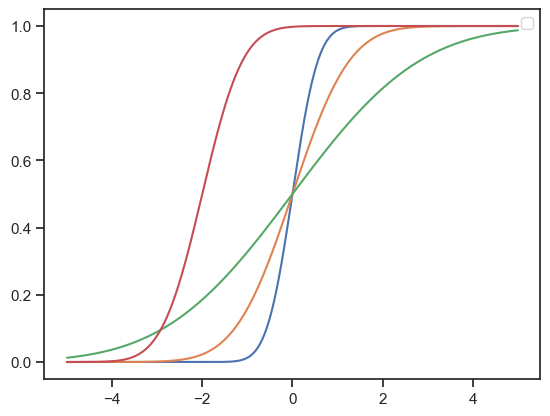

In [48]:

fig, ax = plt.subplots()

x = np.linspace(-5.0, 5.0, 1001)

def cum_dist2(x, mu=0.0, sigma=1.0):
    B = 0.5 * (1.0 + erf((x - mu) / (sigma * np.sqrt(2.0))))
    return B

for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
    ax.plot(x, cum_dist2(x, mu=mu, sigma=np.sqrt(sigma2)))


#plt.show()

ax.legend()


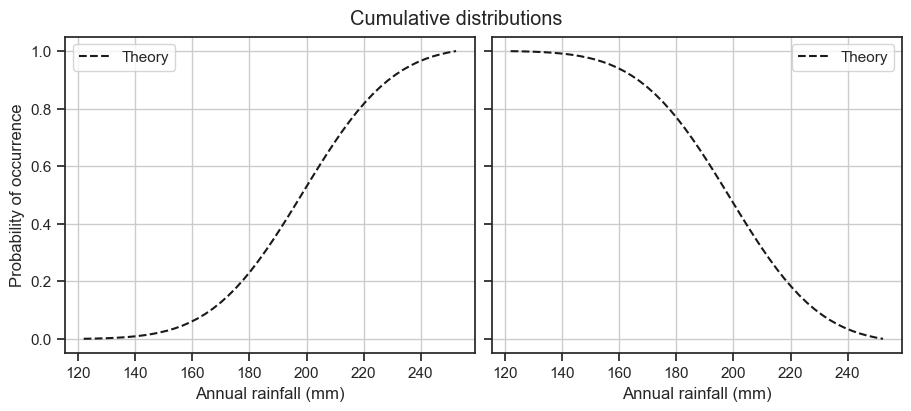

In [49]:
# plot 
# https://matplotlib.org/stable/gallery/statistics/histogram_cumulative.html
# https://uk.mathworks.com/help/matlab/ref/erf.html

np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 25
data = np.random.normal(mu, sigma, size=100)

fig = plt.figure(figsize=(9, 4), layout="constrained")
axs = fig.subplots(1, 2, sharex=True, sharey=True)

# Cumulative distributions.
#axs[0].math.ecdf(data, label="CDF")
#n, bins, patches = axs[0].hist(data, n_bins, density=True, histtype="step",cumulative=True, label="Cumulative histogram")


x = np.linspace(data.min(), data.max())
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (x - mu))**2))
y = y.cumsum()
y /= y[-1]
axs[0].plot(x, y, "k--", linewidth=1.5, label="Theory")

# Complementary cumulative distributions.
#axs[1].ecdf(data, complementary=True, label="CCDF")
#axs[1].hist(data, bins=bins, density=True, histtype="step", cumulative=-1, label="Reversed cumulative histogram")
axs[1].plot(x, 1 - y, "k--", linewidth=1.5, label="Theory")

# Label the figure.
fig.suptitle("Cumulative distributions")
for ax in axs:
    ax.grid(True)
    ax.legend()
    ax.set_xlabel("Annual rainfall (mm)")
    ax.set_ylabel("Probability of occurrence")
    ax.label_outer()

plt.show()

In [50]:
## links

# https://www.geeksforgeeks.org/how-to-make-ecdf-plot-with-seaborn-in-python/
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ecdf.html
# https://matplotlib.org/stable/gallery/statistics/histogram_cumulative.html
# https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/
# https://www.youtube.com/watch?app=desktop&v=3xAIWiTJCvE
# https://stackoverflow.com/questions/62660258/calculate-cumulative-distribution-function-from-a-lis-of-values-in-python
# https://stackoverflow.com/questions/10640759/how-to-get-the-cumulative-distribution-function-with-numpy
# https://www.statology.org/normal-cdf-in-python/#:~:text=The%20easiest%20way%20to%20calculate,function%20from%20the%20SciPy%20library.&text=What%20is%20this%3F,normal%20distribution%20is%20roughly%200.975.
# https://uk.mathworks.com/help/matlab/ref/erf.html
#


In [51]:
# https://www.simplilearn.com/tutorials/statistics-tutorial/cumulative-distribution-function

 # Iris

Notes:

### Video 3

> area under the curve is the probability

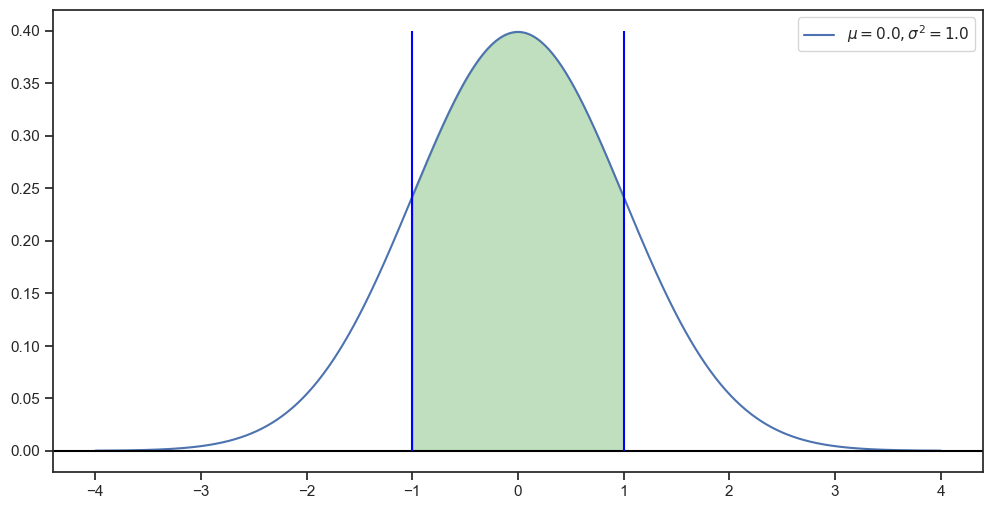

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(-4.0, 4.0, 1001)


# plot the pdf for the SND
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))

ax.plot(x, y, label=f'$ \mu={mu}, \sigma^2 = {sigma2}$')


# add an x axis
ax.axhline(0.0, color='black')

# add vertical lines
ax.vlines([-1.0, 1.0,], 0.0, 0.4, color="blue")
# matplotlib.pyplot.vlines(x, ymin, ymax, colors=None)


# x values between the verical lines
x_interval = np.linspace(-1.0, 1.0, 101)

# shade the area 
ax.fill_between(x_interval, normal_pdf(x_interval), color='green', alpha=0.25)
# the green area represents the probabiity that the 

ax.legend()
#ax.grid()



# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html

In [53]:
# the intersection of the grey and blue lines 

print(f'(-1.0, {normal_pdf(-1.0)})')

print(f'(1.0, {normal_pdf(1.0)})')

(-1.0, 0.24197072451914337)
(1.0, 0.24197072451914337)



![probability](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Standard_deviation_diagram_micro.svg/640px-Standard_deviation_diagram_micro.svg.png)


Notes:

### Video 4

> Np - Normal Random Data

In [54]:
# Normal Data

np.random.standard_normal()

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html



-1.3877369396500803

In [55]:
np.max(np.random.standard_normal(100000))

4.112733309157554

In [56]:
random_data = np.random.standard_normal(100000)

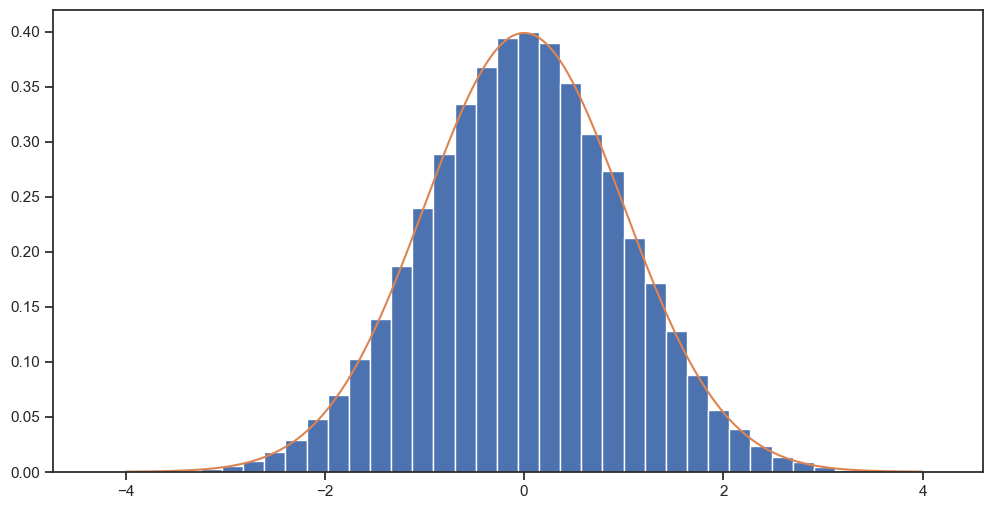

In [57]:
fig, ax = plt.subplots(figsize=(12,6))

ax.hist(random_data, bins=40, density=True)

mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))

ax.plot(x, y, label=f'$ \mu={mu}, \sigma^2 = {sigma2}$')


# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# density - changing this to true changes the yaxis to scale the values to the numbers you have - percentage

# change the number of bins - more bins gives a better pic of data

Notes:

### Video 4

> Sampling Distribution

In [58]:
random_data = np.random.standard_normal((10 , 3))

# this makes an array of samples of data
# 10 arrays * 3 variables
# IID - Independant Identically distributed

random_data

array([[ 0.43645397, -0.24013709,  1.1918613 ],
       [ 1.70047422, -0.91664921, -3.4276126 ],
       [ 0.18760272,  0.85355484, -0.77681169],
       [-0.50490851,  1.75336667, -0.03954564],
       [-0.16167064,  0.0250736 , -1.08834068],
       [ 1.01410309, -0.62761335,  3.10062793],
       [ 1.07909277,  0.7141766 , -1.56046058],
       [-0.84788233, -0.43514592, -0.57140016],
       [ 1.75145344, -1.47977713, -0.66552463],
       [-0.04969666,  1.71392878, -0.76138857]])

In [59]:
random_data = np.random.standard_normal((10000 , 25))

random_data

# for each of these arrays of 25 we will think of them as samples

# note - -4.59988797e-04 --> e-04 multiple by ten to the minus 1 -> divided by 10,000 -> e is exponent


array([[-0.81263047,  0.11171011, -0.21353963, ..., -1.20254018,
         1.65059352, -0.83127108],
       [-0.45429542, -0.13279623,  0.31788102, ..., -0.44127894,
        -1.31878809,  1.35157894],
       [-0.2850082 , -0.71835242, -0.35492239, ..., -0.64198658,
         1.72649362,  0.62535082],
       ...,
       [-0.6075239 , -0.46543133,  0.90011072, ...,  1.8870926 ,
         0.00558648,  0.25031081],
       [-0.13663599, -0.0342642 , -3.69316053, ...,  0.07623442,
        -1.35964748,  0.61618822],
       [-1.45061073,  0.87462938,  1.41468532, ..., -0.77935376,
        -0.54178413,  0.18580401]])

In [60]:
# prove that is is standard normal deviation

# mean ( where the curve is centered)
# spread - variance - standard deviation

# These two will give you an idea of what the values look like


In [61]:
# sum across the rows

random_data.sum()


-147.16730628183333

In [62]:
random_data.mean()

-0.0005886692251273333

In [63]:
random_data.mean(axis=1)

# here we have called the mean for each of the 100 rows

array([-0.20047001, -0.32198064, -0.06682371, ..., -0.23217045,
        0.03373178, -0.13047033])

(array([3.000e+00, 9.000e+00, 1.500e+01, 3.300e+01, 5.000e+01, 9.700e+01,
        1.670e+02, 2.610e+02, 3.790e+02, 4.500e+02, 6.140e+02, 7.480e+02,
        8.600e+02, 1.028e+03, 9.660e+02, 9.420e+02, 8.430e+02, 6.840e+02,
        6.000e+02, 4.480e+02, 2.920e+02, 1.980e+02, 1.350e+02, 8.800e+01,
        4.800e+01, 2.800e+01, 9.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([-0.70650406, -0.65716645, -0.60782883, -0.55849121, -0.5091536 ,
        -0.45981598, -0.41047836, -0.36114075, -0.31180313, -0.26246551,
        -0.2131279 , -0.16379028, -0.11445266, -0.06511505, -0.01577743,
         0.03356019,  0.0828978 ,  0.13223542,  0.18157304,  0.23091065,
         0.28024827,  0.32958589,  0.3789235 ,  0.42826112,  0.47759874,
         0.52693635,  0.57627397,  0.62561159,  0.6749492 ,  0.72428682,
         0.77362444]),
 <BarContainer object of 30 artists>)

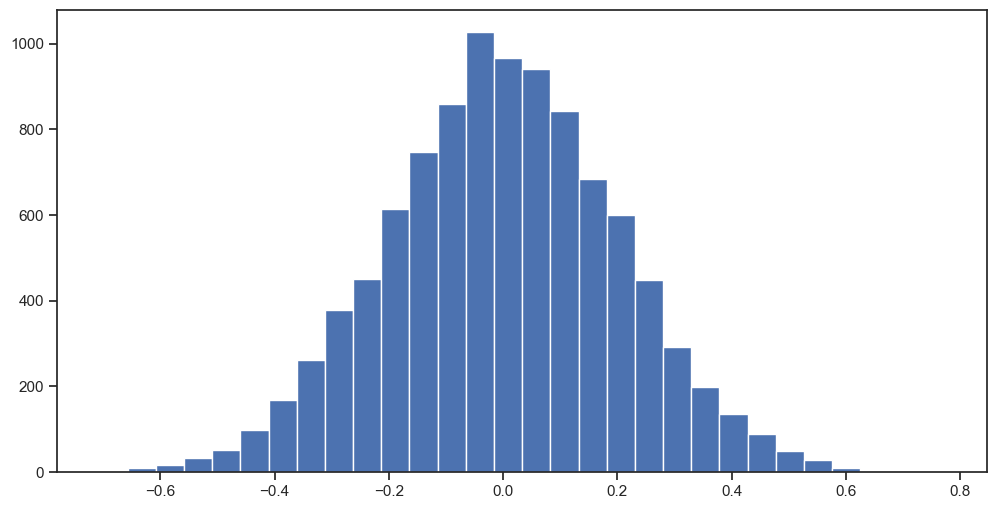

In [64]:
# create an empty fig
fig, ax = plt.subplots(figsize=(12,6))

# histogram of means
ax.hist(random_data.mean(axis=1), bins=30)


# what pattern do they show?
# 10000 sets of 20 - the mean of these 20 values
# bell shaped curve
# 0.00 on the plot - 

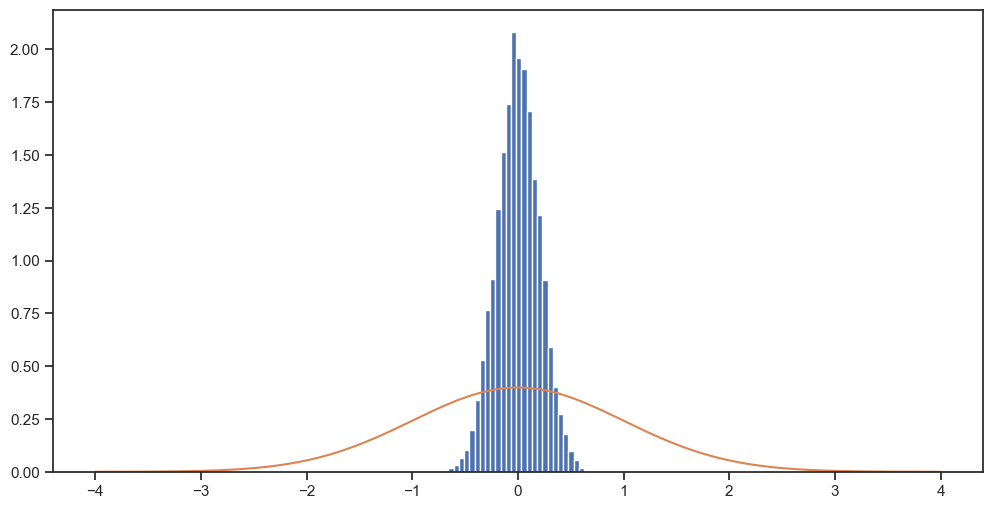

In [65]:
# create an empty fig
fig, ax = plt.subplots(figsize=(12,6))

# histogram of means
ax.hist(random_data.mean(axis=1), bins=30,  density=True)

# need to have density=True to show the line



# plot standard normal dist
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y)

The standard normal distribution is the orange line.

We have taken a sample and got the mean of the samples and plotted them as a histogram.

The histogram looks like its normally distributed but it is not - it does not match the orange line. 

It is centered on the same spot but it doesnt align.

Notes:

### Video 5

> Sampling Distribution Mean


> Density - review this in python  - area of each rectangle represents height is proportion to the area. where the bins are different sizes. The area is what counts with the bins but when the bin sizes are the same we can judge this by the height. If the bin sizes were different this would have an impact and we could not take height has carrying the same proportion weight - what it tells us would not be so clear. 1.75 here on the Y-Axis means 175% but is this becuase the bin size is small

> Proportion of the overall number in the bin is what is shown with Density=True

> The area of each rectangle represents the number in each bin - relevant when bin sizes are different.

> This histogram works by taking the lowest and highest X value and chops it into bins, equally spaced intervals ( 30 in this case), and then the height is proportional to the value of the rectangle. Width * height 

> We change the random sample from 20 - 25. This makes the histogram get taller and thinner. Closer to zero and higher. The large the sample size you get a more accurate estimate for the mean.



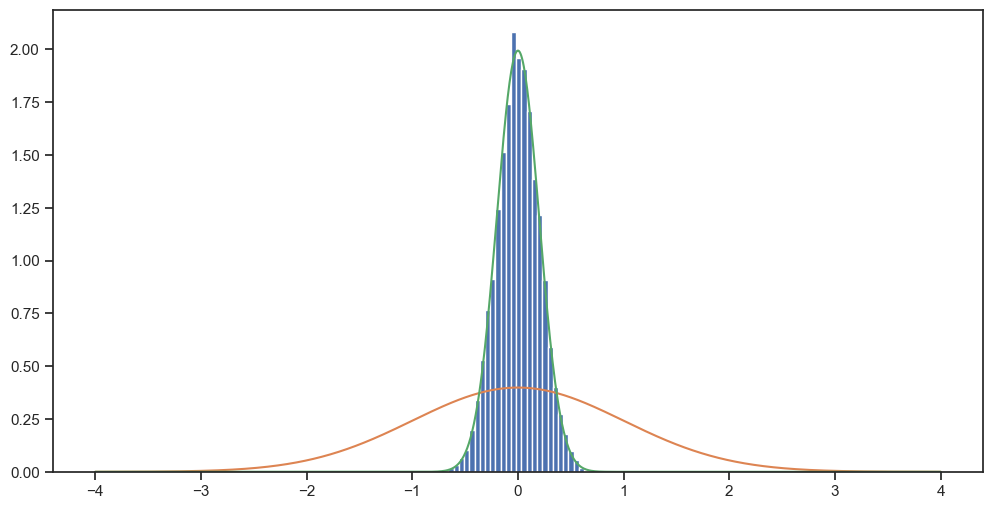

In [66]:
# create an empty fig
fig, ax = plt.subplots(figsize=(12,6))

# histogram of means
ax.hist(random_data.mean(axis=1), bins=30,  density=True)

# need to have density=True to show the line

# normal distribution centered around 0 
# plot standard normal dist
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x, mu=0.0, sigma=1.0)
ax.plot(x, y)


# plot actual distribution - using the standard error function
# plot standard normal dist with mu 0.0 and sigma = 1/5
# sigma = 1/ sqrt of 25 == 1/5 == 0.2
y = normal_pdf(x, mu=0.0, sigma=0.2)
ax.plot(x, y)



The green curve is the normal distribution of the mean

Where with the orange curve we plotted the normal distribution - mu=0 and sigma=1.0 - centered around 0

The green line is mu=0 and sigma=0.2 - centered around 0 // a fifth of sigma / standard deviation

How did we know this second line will match


> https://en.wikipedia.org/wiki/Sampling_distribution

> " In statistics, a sampling distribution or finite-sample distribution is the probability distribution of a given random-sample-based statistic. If an arbitrarily large number of samples, each involving multiple observations (data points), were separately used in order to compute one value of a statistic (such as, for example, the sample mean or sample variance) for each sample, then the sampling distribution is the probability distribution of the values that the statistic takes on. In many contexts, only one sample is observed, but the sampling distribution can be found theoretically."

> Standard Error

Take the standard deviation of the original distribution divided by the square root of the sample size - in our case 1 / sqrt 25 

If sample size was 100 - standard diviation 0.1 / square root of 100

> https://en.wikipedia.org/wiki/Standard_error

$$

\sigma_{x} = \frac{\sigma}{\sqrt(N)} 

$$


By plotting the mean we are getting a tighter grouping around the number we are aiming for - 0

First we generated numbers to the standard normal distribution and plotted those - the blue histogram. We generated individual values, plotted them and then over layed an orange line to show the normal distribution. The blue bars were individual values.

Then we took random samples - 10000 * 25 - so 10000 samples of 25 numbers of the normal distribution. We are going to pretend we do not know what the mean is and from these samples we are trying to guess.

A larger sample gives us a better chance of working out the mean - it offsets outliers



In [67]:
# lets pick a random mean value
# from this we will submit it into our code above and work out what it could be

# uniform - each number has equal chance
random_mu = np.random.uniform(-0.3, 3.0)

# random_mu

In [68]:
# generate data with random mu

random_data = np.random.normal(random_mu, 1.0, (10000 , 25))

random_data

array([[ 0.77513986, -2.15700724,  1.23543245, ...,  0.0319651 ,
        -0.21567801,  0.91223741],
       [ 1.13206477,  1.12833637,  0.55202892, ...,  0.57475611,
         0.72033057, -0.48336482],
       [-0.04064228,  2.24180196,  1.27320434, ...,  1.00919602,
         1.55110256, -0.8680162 ],
       ...,
       [ 0.93325911,  1.39410288,  1.59823679, ...,  1.7017968 ,
        -1.6453127 , -1.72864457],
       [ 1.09213388,  1.17766422,  0.66276031, ...,  2.93887137,
         1.67997779,  0.86055666],
       [ 0.65883017,  1.10857984,  2.11673921, ...,  0.24571394,
         0.5267198 , -0.4389031 ]])

(array([0.00428951, 0.01286853, 0.04075034, 0.04932936, 0.07506642,
        0.18444891, 0.26166008, 0.42466145, 0.63270266, 0.82787535,
        1.02733754, 1.4562885 , 1.64717168, 1.80159402, 1.98175342,
        2.02250376, 1.95816112, 1.77156745, 1.39623537, 1.24610253,
        0.83645437, 0.69704531, 0.41608243, 0.29168665, 0.19088318,
        0.08793495, 0.04718461, 0.03646083, 0.01072377, 0.01072377]),
 array([-0.12769864, -0.08107326, -0.03444788,  0.01217749,  0.05880287,
         0.10542825,  0.15205362,  0.198679  ,  0.24530438,  0.29192975,
         0.33855513,  0.38518051,  0.43180588,  0.47843126,  0.52505664,
         0.57168201,  0.61830739,  0.66493277,  0.71155814,  0.75818352,
         0.8048089 ,  0.85143427,  0.89805965,  0.94468503,  0.9913104 ,
         1.03793578,  1.08456116,  1.13118653,  1.17781191,  1.22443729,
         1.27106267]),
 <BarContainer object of 30 artists>)

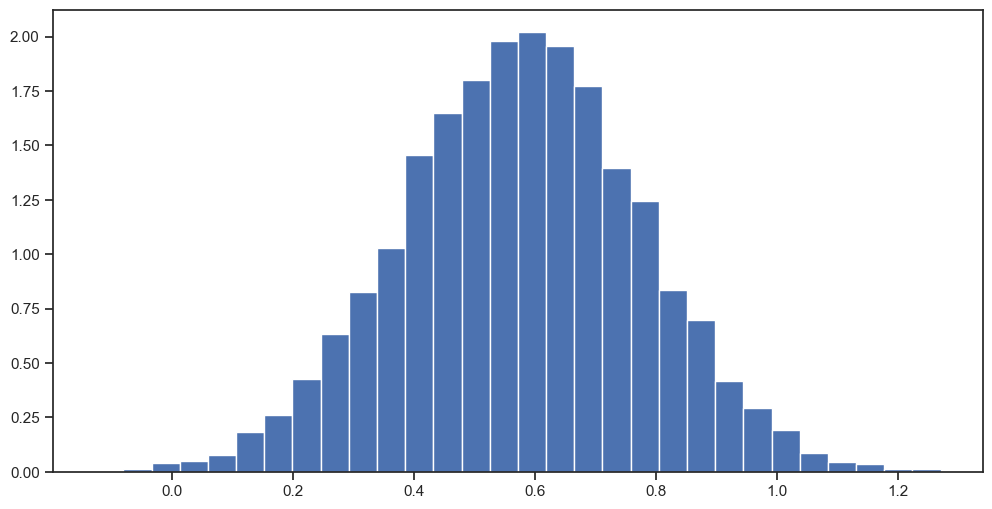

In [69]:
# plot histogram with random mu

# create an empty fig
fig, ax = plt.subplots(figsize=(12,6))

# histogram of means
ax.hist(random_data.mean(axis=1), bins=30,  density=True)

What do we think the mean is?

Ans: where the highest values centre around.

> look up confidence intervals

> rational?

In [70]:
# lets see 

random_mu

0.575836304530726

In [71]:
# A random sample of size 50 

# her we have mocked up the data
sample = np.random.normal(random_mu, 1.0, 50)

# generally all we would have is this - a sample
sample

array([ 0.39400778, -0.02879036,  0.61982713,  0.58695095, -1.12324447,
       -0.43107799,  0.92731822,  1.31796116,  0.21824822,  0.73872064,
        0.74465924, -0.92652713,  2.00677613,  2.65158189,  0.82168095,
        0.43094062,  2.24675867,  0.24262874,  1.226096  ,  0.09826352,
        1.1071708 ,  1.53434672,  0.99945879,  0.37834249,  2.19826647,
        0.10717712,  0.99550744,  0.8132897 ,  0.31536538, -0.21919552,
        1.05602949,  0.08050079,  0.78721159,  0.48718135,  0.72215749,
       -0.25640676, -0.11793683, -0.10927572,  1.0229756 ,  2.36508994,
       -0.39866661,  0.69587052,  0.56132281,  0.85244339, -0.11020166,
       -0.4763603 , -0.15379064,  0.75037838,  1.84807248, -0.22864379])

In [72]:
sample.mean()

# this is a a sample mean = an estimate of the population mean

# the output is the statistic = the result =  used to estimate a parameter 


0.6074092163586595

Notes:

### Video 6

> Independent Samples T-Test

A T - Test is used to compare two samples to see if they came from the same population

> https://www.scribbr.com/statistics/t-test/


![T-Tests](images/What-type-of-t-test-should-I-use.webp)

Paired Example - student results before and after a lesson

Independent Sample - the values are different in each

In [76]:
# Load Iris Data Set

df = pd.read_csv('files/Iris.csv')

df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [81]:
sample_a = df[df['class'] == 'setosa']['petal_length'].to_numpy()

sample_a

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [82]:
len(sample_a)

50

In [90]:
np.mean(sample_a)

1.464

In [92]:
np.std(sample_a)

0.17176728442867112

In [84]:
sample_b = df[df['class'] == 'virginica']['petal_length'].to_numpy()

sample_b

array([6. , 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5,
       5. , 5.1, 5.3, 5.5, 6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. ,
       4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8,
       5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [85]:
len(sample_b)

50

In [89]:
np.mean(sample_b)

5.5520000000000005

In [91]:
np.std(sample_b)

0.546347874526844

We are going to compare the petal length of the setosas to the virginica from the same sample - iris dataset

We are assuming these are IDD and are normally distributed


We are going to run a T-Test to see if there is evidence to suggest that the average of the virginicas does not match the setosas - the mean of the underlying population mean - is the mean equal? 


is the standard deviation the same? - - this can also be tested 

![Probability Density Function](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Student_t_pdf.svg/600px-Student_t_pdf.svg.png)

In [88]:
# t-test

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

ss.ttest_ind(sample_a, sample_b)


TtestResult(statistic=-49.965703359355636, pvalue=1.5641224158883576e-71, df=98.0)

T Distribution

statistic=-49.965703359355636

"What Is a T-Distribution?
The t-distribution, also known as the Student’s t-distribution, is a type of probability distribution that is similar to the normal distribution with its bell shape but has heavier tails. It is used for estimating population parameters for small sample sizes or unknown variances. T-distributions have a greater chance for extreme values than normal distributions, and as a result have fatter tails."


> https://www.investopedia.com/terms/t/tdistribution.asp

P Value

pvalue=1.5641224158883576e-71

1.56 power of e-71


The underlying assumption here is that the means are equal for both samples; the means of the distributions the two samples are picked from are the same. ( as a default we are also standard deviation ). We are assuming that these samples come from the same distribution. We are assuming that all 100 values are from the same distribution - it will treat both groups the same - this is the null hypotesis

Assume the means are the same, and what are the chances of seeing the data we are seeing?

What are the chance that both groups come from an underlying distribution with the same mean?

Looking at the numbers it doesnt seem possible but what is the likelihood?

What Is P-Value?
"In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. The p-value serves as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis."

"A null hypothesis is a type of statistical hypothesis that proposes that no statistical significance exists in a set of given observations."


> https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20measures%20the,is%20generally%20considered%20statistically%20significant.

> https://www.investopedia.com/terms/n/null_hypothesis.asp



Answer:
The underlying assumption for the t-test was that the average petal length were the same in both samples, we have 50 values for each which to test this on.

The probability of seeing data like this is very unlikely - therefore we reject the above hypotesis.

Looking at the numbers you can see they do not overlap.

Degrees of Freedon

df=98.0

"In statistics, the number of degrees of freedom is the number of values in the final calculation of a statistic that are free to vary."

> https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)


We have 50 values in each sample - once we calculate the mean of sample A, we have freedom to pick 49 values but the 50th we can work out cos we have the mean.

98 = 49+49

When the number of degrees of freedom you get the yellow line on the graph above - we got 98 / or 49 which is closest to the blackline. The blackline goes from -4 -> 4 , we are way out from this. We therefore have extreme data - it is way out.

We are 49 out from 0


> https://en.wikipedia.org/wiki/Student%27s_t-distribution




Result:

This T-Test provides evidence that the mean petal length of the sertosa is different from the mean petal length of the virginica based on the samples provided. 

Our Assumption - that the means match - The null hypotesis is not true / rejected.

There is a possibility but this would be way out in probability terms.

It is improbable that these distributions are the same.

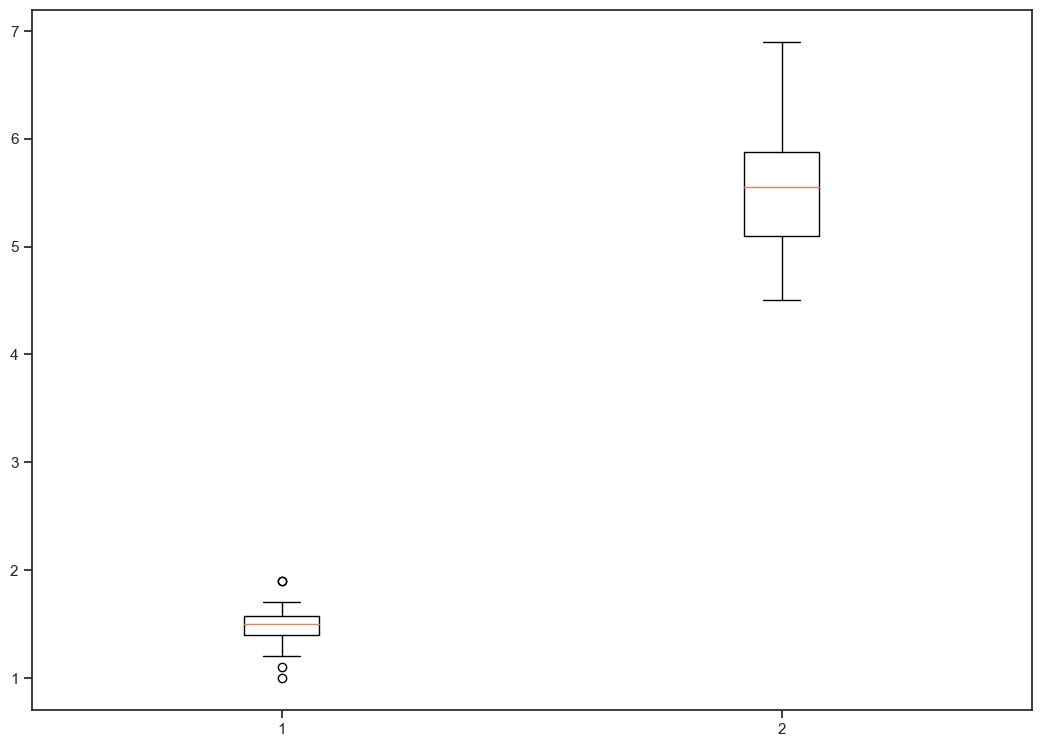

In [93]:
# Plot and Compare Samples

# set data
data = [sample_a, sample_b]
 
# set plot
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

# https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

Bibliography:

[1] https://sites.nicholas.duke.edu/statsreview/continuous-probability-distributions/

[2] https://en.wikipedia.org/wiki/Normal_distribution

[3] Latex  - https://gist.github.com/LKS90/252ac41bd4a173be35b0

[4] Probability Function - https://tex.stackexchange.com/questions/592294/writing-probability-density-function-in-latex


> setting colours to match graph
[5] https://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure

[6] https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

[7] https://matplotlib.org/stable/users/explain/artists/color_cycle.html

[8] https://stackoverflow.com/questions/61582056/how-can-i-synch-up-the-colors-for-each-iteration-in-a-loop-that-plots-successive


> Cumulative Distribution

[9] https://en.wikipedia.org/wiki/File:Normal_Distribution_CDF.svg

[10] https://en.wikipedia.org/wiki/Golden_ratio

[11] Golden Ratio Image - https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/SimilarGoldenRectangles.svg/262px-SimilarGoldenRectangles.svg.png

[12] Erf https://www.statisticshowto.com/error-function/

